# Project Description

The COVID-19 pandemic, which is a still ongoing global pandemic of coronavirus disease, Which Start in 2019. At the end of 2019, the world first faced with these new challenge. The novel (new) virus was first identified in Wuhan, China; in December 2019. After that it  managed to spread world wide, which also include Germany.

we have a datasets (three) containing information about the infection cases, deaths and number of vaccinated in Germany.

For our project work we have chosen this data and Now see what we can retain from it.

#### Environment Setting
* Python : Version 3.8.8 is used. Along with following library 
    - Pandas : The data analysis library 
    - Numpy : math and array support for analysis 
    - Matplotlib : Data visiualization library 
    - seaborn : Data visualization 
    - plotly : Secified data visualization
    - Pandas_profiling : Data profiling library 
    - geopandas : geo data visualization
    - And some other library for minor role like string, unicodedata etc.
 

## Meta Data 

Name : COVID-19 Tracking Germany <br>
Licence : The demographic data & geospatial shape files are being licensed via the "Data licence Germany – attribution – Version 2.0" <br>
Dataset link : https://www.kaggle.com/datasets/headsortails/covid19-tracking-germany  <br>
Usability : 7.65


##### covid_de 
<div class="alert alert-block alert-info">
<b>covid_de :</b> The first dataset, which we named 'covid_de', contains many rows of data with information on covid cases, deaths and recoveries in Germany.</br>
The data is separated into the following 8 columns :

    state : The state to which the tested individuals belong;
    county : The county which the state belongs to;
    age_group : The age group of the tested (xx-xx);
    gender : The gender of the tested;
    date : The date of the tests (YYYY-MM-DD);
    cases : The number of new covid cases;
    deaths : The number of deaths;
    recovered : The number of recovered cases.
</div>


##### covid_de_vaccines

<div class="alert alert-block alert-info">
<b>covid_de_vaccines :</b> The second dataset, which we named 'covid_de_vaccines', contains many rows of data with information on the COVID vaccines in Germany. </br>
The data is separated into the following 9 columns :

    date : The date of the administration of the vaccine (YYYY-MM-DD);
    doses : The number of doses administered;
    doses_first : The number of first doses administered;
    doses_second : The number of second doses administered;
    pfizer_cumul : The cumulated number of the Pfizer vaccine doses administered;
    moderna_cumul : The cumulated number of the Moderna vaccine doses administered;
    Astrazeneca_cumul : The cumulated number of the AstraZeneca vaccine doses administered;
    persons_first_cumul : The cumulated number of patients who have received the first dose of the vaccine;
    persons_full_cumul : The cumulated number of patients who are fully vaccinated, meaning they have received the full dose of the vaccine.
</div>

##### demographics

<div class="alert alert-block alert-info">
<b>demographics :</b> The third dataset, which we named 'demographics', contains many rows of data with information on the demographic distribution in Germany.</br> 
The data is separated into the following 4 columns :

    state : The state to which the demographic belongs;
    gender : The gender of the demographic group;
    age_group : The age group of the demographic (xx-xx);
    population : The number of individuals;
</div>

# Table of contents
    1: Data Pre processing  
    2: Data profiling
    3: Data visualization
    

### 1: Data Pre processing
    
 * Importing Packages and functions
 * Importing Datasets
 * Normalize and clean dataset
 * Checking Anamalies in Data
 * Converting Data for Analysis

### 2: Data Profiling 

1. Profiling tasks
	- Single-column profiling
	- Multi-column profiling
	- Dependencies
	
2. Single-Column analysis
	* 2.1 Cardinalities
	* 2.2 Value distribution
	* 2.3 Types and patterns
	* 2.4 Data completeness

3. Multi-column analysis
	* 3.1 Correlations and association rules
	* 3.2 Clustering and outlier detection
	* 3.3 Summaries and sketches
	
4. Dependency detection
	* 4.1 Unique column combinations and keys
	* 4.2 Functional dependencies

### 3: Exploratory Data Analysis

* Data Description
* Data Visualization

## Data Pre processing
### Importing Packages and functions

In [84]:
import unicodedata
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
import string
import plotly.express as px


In [85]:
from pandas_profiling import ProfileReport     # portfolio analysis for metatdata 
from dash import Dash, dcc, html, Input, Output # Dash bord analysis 
from matplotlib.gridspec import GridSpec  # fig gridspec

In [86]:
# Geo data analysis 
import geopandas as gpd
df_map = gpd.read_file("Data\de_state.shp")
df_map = df_map.drop(columns=["ADE", "RS", "RS_0"])

In [87]:
# Image display
from IPython.display import Image
from IPython.core.display import HTML 

### Importing Datasets

In [88]:
df_covid = pd.read_csv("Data\covid_de.csv")

In [89]:
df_covid["state"] = df_covid["state"].replace("Baden-Wuerttemberg", "Baden-Württemberg")
df_covid["state"] = df_covid["state"].replace("Thueringen", "Thüringen")

In [90]:
print('----- Covid Data set information ----- ')
display (df_covid.sample(10))
print('---')
display (df_covid.info())

----- Covid Data set information ----- 


,state,county,age_group,gender,date,cases,deaths,recovered
1962890,Rheinland-Pfalz,LK Rhein-Hunsrueck-Kreis,35-59,F,2021-05-16,1,0,1
541877,Bayern,LK Muenchen,60-79,M,2020-04-04,3,0,3
770182,Bayern,SK Landshut,35-59,M,2021-05-04,8,0,8
236593,Baden-Württemberg,SK Baden-Baden,35-59,M,2022-03-22,34,0,34
1655330,Nordrhein-Westfalen,LK Rheinisch-Bergischer Kreis,80-99,M,2020-04-07,1,0,1
1982865,Rheinland-Pfalz,LK Suedwestpfalz,15-34,F,2021-05-27,1,0,1
629296,Bayern,LK Roth,35-59,F,2022-02-28,22,0,22
787937,Bayern,SK Nuernberg,05-14,M,2021-10-18,4,0,4
140339,Baden-Württemberg,LK Ortenaukreis,60-79,M,2021-04-21,6,0,6
1228238,Mecklenburg-Vorpommern,LK Vorpommern-Greifswald,00-04,M,2022-04-22,6,0,6


---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439229 entries, 0 to 2439228
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   county     object
 2   age_group  object
 3   gender     object
 4   date       object
 5   cases      int64 
 6   deaths     int64 
 7   recovered  int64 
dtypes: int64(3), object(5)
memory usage: 148.9+ MB


None

<div class="alert alert-block alert-info">
<style>
ul.a{list-style-type: circle;}
</style>
<b>
Observations "Covid"
</b> 
<p>we observe the following, For the covid dataset :</p>

<ul class="a">
  <li>These Dataset have 2439229 entries and 8 columns.</li>
  <li>It have 5 Catagorical columns :  state, county,age_group, gender and date.</li>
  <li>It have 3 Numerical columns :  cases, deaths, and recovered.</li>
</ul>

<p>The <b>Date</b> is not recongnize as TimeStamp. </p>

</div>

In [91]:
df_vaccine = pd.read_csv("Data\covid_de_vaccines.csv")

In [92]:
print('----- Vaccines Data set information ----- ')
display (df_vaccine.sample(10))
print('---')
display (df_vaccine.info())

----- Vaccines Data set information ----- 


,date,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
375,2022-01-06,683718,51479,92297,115814320,24469898,12780917,62957264,59512844
84,2021-03-21,165066,126724,38342,8602600,464406,2088219,7722887,3432444
29,2021-01-25,91078,52347,38731,1958695,32636,134,1684444,307052
366,2021-12-28,748297,64540,80240,113594307,22586322,12778936,62613654,58999291
219,2021-08-03,500784,96698,403683,71375258,8613419,12632433,52544327,44497255
451,2022-03-23,178842,5830,13411,130167734,30400291,12790961,64530931,62995155
165,2021-06-10,1219353,512191,706879,44353032,4790809,9976793,40330710,20984574
133,2021-05-09,280596,179427,101169,26337806,2377609,6937270,27736715,7946148
340,2021-12-02,1189177,117137,88912,101338576,11636254,12774964,60811071,57136181
316,2021-11-08,179551,31157,36009,89544361,9843290,12770869,58931592,55722673


---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 622 non-null    object
 1   doses                622 non-null    int64 
 2   doses_first          622 non-null    int64 
 3   doses_second         622 non-null    int64 
 4   pfizer_cumul         622 non-null    int64 
 5   moderna_cumul        622 non-null    int64 
 6   astrazeneca_cumul    622 non-null    int64 
 7   persons_first_cumul  622 non-null    int64 
 8   persons_full_cumul   622 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 43.9+ KB


None

<div class="alert alert-block alert-info">
<style>
ul.a{list-style-type: circle;}
</style>
<b>
Observations "Vaccine"
</b> 
<p>we observe the following, For the Vaccine dataset :</p>

<ul class="a">
  <li>These Dataset have 622 entries and 8 columns.</li>
  <li>It have 1 Catagorical columns : date.</li>
  <li>It have 7 Numerical columns : All remaining columns.</li>
</ul>

<p>The <b>Date</b> is not recongnize as TimeStamp. </p>

</div>

In [93]:
df_demographic = pd.read_csv("Data\demographics_de.csv")

In [94]:
print('----- Demographics Data set information ----- ')
display (df_demographic.sample(10))
print('---')
display (df_demographic.info())

----- Demographics Data set information ----- 


,state,gender,age_group,population
86,Mecklenburg-Vorpommern,female,15-34,146826
170,Schleswig-Holstein,female,15-34,305125
87,Mecklenburg-Vorpommern,female,35-59,275036
160,Sachsen-Anhalt,female,60-79,314851
42,Brandenburg,male,00-04,55847
168,Schleswig-Holstein,female,00-04,62645
149,Sachsen,female,80-99,210571
97,Niedersachsen,female,05-14,349011
152,Sachsen,male,15-34,425911
125,Rheinland-Pfalz,female,80-99,166945


---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


None

In [95]:
df_demographic["state"] = df_demographic["state"].replace("Baden-Wuerttemberg", "Baden-Württemberg")
df_demographic["state"] = df_demographic["state"].replace("Thueringen", "Thüringen")

<div class="alert alert-block alert-info">
<style>
ul.a{list-style-type: circle;}
</style>
<b>
Observations "Demographics"
</b> 
<p>we observe the following, For the Demographics dataset :</p>

<ul class="a">
  <li>These Dataset have 192 entries and 4 columns.</li>
  <li>It have 3 Catagorical columns : state, gender, age_group.</li>
  <li>It have 1 Numerical columns : population.</li>
</ul>

</div>

### Normalize and clean dataset

#### Missing Values
* Q-1. How much data are missing in each data set?
* Q-2. The percentatge of missing data? 

In [96]:
missing_values_covid = df_covid.isnull().sum()  # missing sum in covid data set 
print('-----Missing Values in Covid dataset -----')
display(missing_values_covid)

-----Missing Values in Covid dataset -----


state             0
county            0
age_group     13370
gender       110810
date              0
cases             0
deaths            0
recovered         0
dtype: int64

In [97]:
missing_values_vaccine = df_vaccine.isnull().sum()  # missing sum in covid data set 
print('-----Missing Values in Vaccine dataset -----')
display(missing_values_vaccine)

-----Missing Values in Vaccine dataset -----


date                   0
doses                  0
doses_first            0
doses_second           0
pfizer_cumul           0
moderna_cumul          0
astrazeneca_cumul      0
persons_first_cumul    0
persons_full_cumul     0
dtype: int64

In [98]:
missing_values_demographic = df_demographic.isnull().sum()  # missing sum in covid data set 
print('-----Missing Values in Demographic dataset -----')
display(missing_values_demographic)

-----Missing Values in Demographic dataset -----


state         0
gender        0
age_group     0
population    0
dtype: int64

In [99]:
print('----- Percentage of missing data -----')
print('{:.2%} of rows in the covid dataset have missing data.'.format(df_covid.isnull().sum().sum()/len(df_covid)))
print('{:.2%} of rows in the Vaccine dataset have missing data.'.format(df_vaccine.isnull().sum().sum()/len(df_vaccine)))
print('{:.2%} of rows in the Demographic dataset have missing data.'.format(df_demographic.isnull().sum().sum()/len(df_demographic)))

----- Percentage of missing data -----
5.09% of rows in the covid dataset have missing data.
0.00% of rows in the Vaccine dataset have missing data.
0.00% of rows in the Demographic dataset have missing data.


<div class="alert alert-block alert-info">
<style>
ul.a{list-style-type: circle;}
</style>
<b>
Observations "Missing Data"
</b> 
<p>we observe the following, For the Missing data in the all datasets :</p>

<ul class="a">
  <li><b>age_group</b> and <b>gender</b> column in the covid dataset have missing value.</li>
  <li>All togather 5.09% of data have missing row. </li>
  <li>gender have the major portion of missing data. </li>
</ul>

</div>

#### Duplicates in dataset 
* Find Duplicate value in dataset  


In [100]:
print('----- Duplicate value in Covid Dataset -----')
print(df_covid.duplicated().sum())
print('---')

print('----- Duplicate value in Vaccine Dataset -----')
print(df_vaccine.duplicated().sum())
print('---')

print('----- Duplicate value in Demographic Dataset -----')
print(df_demographic.duplicated().sum())
print('---')

----- Duplicate value in Covid Dataset -----
0
---
----- Duplicate value in Vaccine Dataset -----
0
---
----- Duplicate value in Demographic Dataset -----
0
---


<div class="alert alert-block alert-info">
<style>
ul.a{list-style-type: circle;}
</style>
<b>
Observations "Duplicate Value"
</b> 
<p>we observe the following, For the Duplicate data in the all datasets :</p>

<ul class="a">
  <li>No Duplicate value have found in the dataset.</li>
</ul>

</div>

#### Clean dataset 
* Assign 'U' for unknown gender type 
* Delete missing row of age_group 
* convert date from odject to datetime in covid and vaccine data set  
* change gender from male -> M and Female -> F in Demographics data set

In [101]:
df_covid['gender'] = df_covid['gender'].fillna('U')  # assign U for unknown gender

In [102]:
df_covid = df_covid.dropna()   # delete row of missing data from covid dataset

In [103]:
df_covid['date'] = df_covid['date'].astype('datetime64[D]')  # convet datetime odject  
df_vaccine['date'] = df_vaccine['date'].astype('datetime64[D]')

In [104]:
df_demographic['gender'] = df_demographic['gender'].replace('male','M')        # change fullname to letter
df_demographic['gender'] = df_demographic['gender'].replace('female','F')

In [105]:
print('-----Change in  Covid Dataset -----')
display(df_covid.info())
print('---')

print('----- Change in  Vaccine Dataset -----')
display(df_vaccine.info())
print('---')

print('----- Change in Demographics Dataset -----')
display (df_demographic.sample(10))
print('---')


-----Change in  Covid Dataset -----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2425859 entries, 0 to 2439224
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   state      object        
 1   county     object        
 2   age_group  object        
 3   gender     object        
 4   date       datetime64[ns]
 5   cases      int64         
 6   deaths     int64         
 7   recovered  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 166.6+ MB


None

---
----- Change in  Vaccine Dataset -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 622 non-null    datetime64[ns]
 1   doses                622 non-null    int64         
 2   doses_first          622 non-null    int64         
 3   doses_second         622 non-null    int64         
 4   pfizer_cumul         622 non-null    int64         
 5   moderna_cumul        622 non-null    int64         
 6   astrazeneca_cumul    622 non-null    int64         
 7   persons_first_cumul  622 non-null    int64         
 8   persons_full_cumul   622 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 43.9 KB


None

---
----- Change in Demographics Dataset -----


,state,gender,age_group,population
117,Nordrhein-Westfalen,M,35-59,3127984
41,Brandenburg,F,80-99,115779
73,Hessen,F,05-14,276229
20,Bayern,M,15-34,1639500
162,Sachsen-Anhalt,M,00-04,46757
134,Saarland,F,15-34,103235
72,Hessen,F,00-04,147570
147,Sachsen,F,35-59,658461
114,Nordrhein-Westfalen,M,00-04,440708
122,Rheinland-Pfalz,F,15-34,448341


---


<div class="alert alert-block alert-info">
<style>
ul.a{list-style-type: circle;}
</style>
<b>
Observations "Data is ready for next Step"
</b> 
</div>

## Data Profiling 


The process of examining data available from an existing data source and gathering statistics or informative summaries about that data is called data profiling. 
 Profiling activities range from ad hoc approaches such as looking at random subsets of data or building aggregation queries to systematically deriving structural information and statistics from a dataset using specific profiling tools.

### Single-column profiling
* Cardinalities
* Value distribution
* Types and patterns
* Data completeness

#### Covid Dataset 

In [106]:
print('----- Covid Dataset Descriptions of numeric column-----')
display(df_covid.describe().round(2))
print('---')

----- Covid Dataset Descriptions of numeric column-----


,cases,deaths,recovered
count,2425859.00,2425859.00,2425859.00
mean,13.36,0.06,13.04
std,31.08,0.33,31.07
min,0.00,0.00,-5.00
25%,1.00,0.00,1.00
50%,4.00,0.00,4.00
75%,12.00,0.00,11.00
max,2151.00,21.00,2151.00


---


In [107]:
print('----- Covid Dataset Descriptions of object column-----')
print (df_covid.describe(include=['object']))
print('---')

----- Covid Dataset Descriptions of object column-----
          state      county age_group   gender
count   2425859     2425859   2425859  2425859
unique       16         411         6        3
top      Bayern  SK Hamburg     35-59        F
freq     541545       10884    541619  1162497
---


#### Vaccine Dataset 

In [108]:
print('----- Vaccine Dataset Descriptions of numeric column -----')
display(df_vaccine.describe().round(2))
print('---')

----- Vaccine Dataset Descriptions of numeric column -----


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
count,622.00,622.00,622.00,6.220000e+02,622.00,622.00,622.00,622.00
mean,297290.04,104133.64,98311.28,8.335661e+07,15927599.53,10133954.49,47752455.24,42692254.29
std,336774.53,164220.58,155722.11,4.883776e+07,12637958.93,4551260.45,22552687.66,24457083.21
min,1612.00,57.00,0.00,2.442000e+04,8.00,1.00,24429.00,0.00
25%,53677.25,2603.00,3406.50,3.764634e+07,4076724.00,9380956.25,36669522.75,15326236.50
50%,173215.00,50002.00,51604.50,8.858695e+07,9806497.00,12770365.50,58746798.00,55479575.50
75%,396072.50,118108.50,96980.00,1.315751e+08,30697978.75,12792055.00,64587987.50,63122089.50
max,1561199.00,1095872.00,930602.00,1.367508e+08,31473301.00,12796852.00,64771126.00,63443727.00


---


#### Demographic Dataset 

In [109]:
print('----- Demographic Dataset Descriptions of numeric column -----')
display(df_demographic.describe().round(2))
print('---')

----- Demographic Dataset Descriptions of numeric column -----


,population
count,192.00
mean,432391.73
std,557233.70
min,15906.00
25%,95457.00
50%,234596.00
75%,484169.00
max,3147565.00


---


In [110]:
print('----- Demographic Dataset Descriptions of object column-----')
print (df_demographic.describe(include=['object']))
print('---')

----- Demographic Dataset Descriptions of object column-----
            state gender age_group
count         192    192       192
unique         16      2         6
top     Thüringen      M     35-59
freq           12     96        32
---


##### Observations 

<div class="alert alert-block alert-info">
<style>
ul.a{list-style-type: circle;}
</style>
<b>
Observations "Single-column profiling"
</b> 
<p>we observe the following, For the Single-cloumn profiling :</p>
</br><b>Covid dataset</b>
<ul class="a">
  <li>cases column have  min - 0, Max - 2151, with mean value of 13.36</li>
  <li>deaths column have min - 0, Max - 21, with mean value of 0.06</li>
  <li>recovered column have min - (-5), Max - 2151 with mean value of 13.04 . </li>
  <li>State column have 16 unique value</li>
  <li>county column have 411 unique value</li> 
  <li>age_group column have 6 unique value</li> 
  <li>age_group and gender had null values, which are attended in data pre processing stage</li>
  
</ul>

</br><b>Vaccine Data set </b>
<ul class="a">
  <li>All most all column is related to vaccine information </li>
  <li>It also  have company wise cumalative vaccine dose information </li>
  <li>minmum value in doses column 1612 and maximum value is 1561199 </li>
</ul>

</br><b>Demographic Dataset</b>
<ul class="a">
  <li>populatin min - 15906 and max - 3147565</li>
  <li>Also contain information of gender and age group</li>
</ul>

</div>

### Multi-columns Profiling 
* Correlaations and association rules 
* Clusters
* Outliers
* Summaries & sketches

In [111]:
# Covid dataset analysis 
profile_covid = ProfileReport(df_covid, title="Pandas Profiling Report")
profile_covid.to_widgets()

Summarize dataset:  57%|█████▋    | 13/23 [00:10<00:04,  2.01it/s, Calculate kendall correlation] c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [112]:
# Vaccine dataset analysis 
profile_vaccine = ProfileReport(df_vaccine, title="Pandas Profiling Report")
profile_vaccine.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [113]:
# Demographic dataset analy
profile_demographic = ProfileReport(df_demographic, title="Pandas Profiling Report")
profile_demographic.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

##### Time line of Dataset

In [114]:
print('----- Time line ----- ')
print('')
print('Covid data table')
print('Start date  :', df_covid.date.min(),'.')
print('')
print('Covid data table')
print('End date  :', df_covid.date.max(),'.')
print('')

print('Vaccine data table')
print('Start date :', df_vaccine.date.min(),'.')
print('')
print('Vaccine data table')
print('End date :', df_vaccine.date.max(),'.')
print('')

----- Time line ----- 

Covid data table
Start date  : 2020-01-02 00:00:00 .

Covid data table
End date  : 2022-09-09 00:00:00 .

Vaccine data table
Start date : 2020-12-27 00:00:00 .

Vaccine data table
End date : 2022-09-09 00:00:00 .



----- Covid by Date -----
            cases  deaths  recovered
date                                
2020-01-02      1       0          1
2020-01-23      1       0          1
2020-01-28      2       0          2
2020-01-29      2       0          2
2020-01-31      4       0          4
...           ...     ...        ...
2022-09-05  42691      20        176
2022-09-06  45507       6         94
2022-09-07  38825       5         54
2022-09-08  32211       5         60
2022-09-09  20399       3         20

[947 rows x 3 columns]


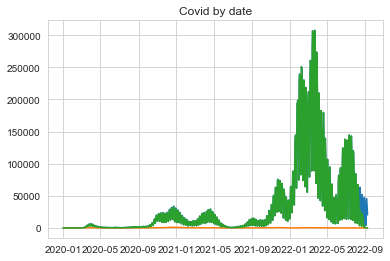

In [115]:
print('----- Covid by Date -----')
covid_bydate = df_covid.groupby('date').sum()
print(covid_bydate)
plt.plot(covid_bydate)
plt.title("Covid by date")
plt.show()

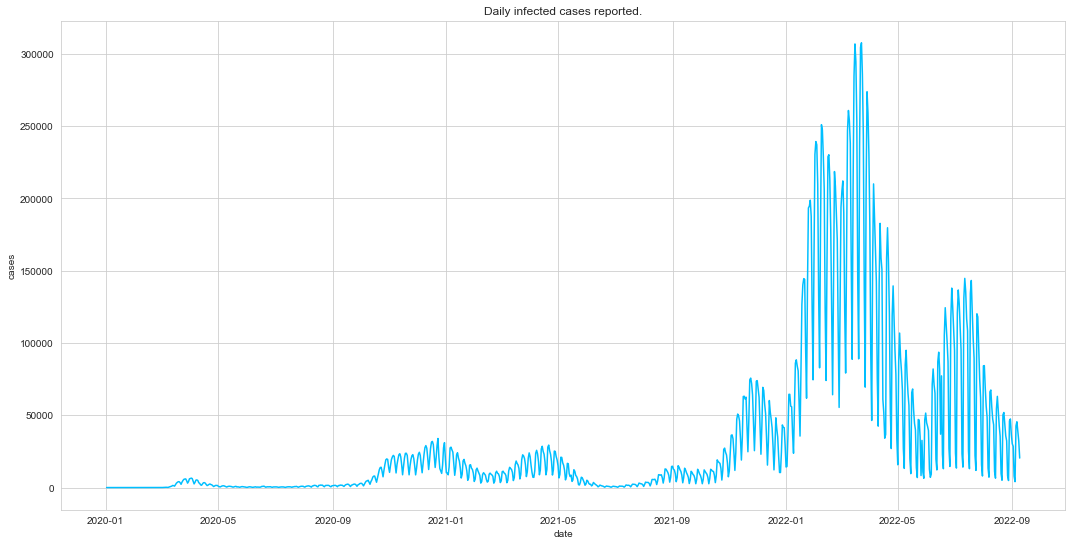

In [116]:
df_covid_by_date = df_covid.groupby('date').sum()

sns.set_style("whitegrid")
plt.figure(figsize=(18,9))
plt.title('Daily infected cases reported.')
sns.lineplot(x = 'date', y = 'cases',data=df_covid_by_date, color='deepskyblue')
plt.show()

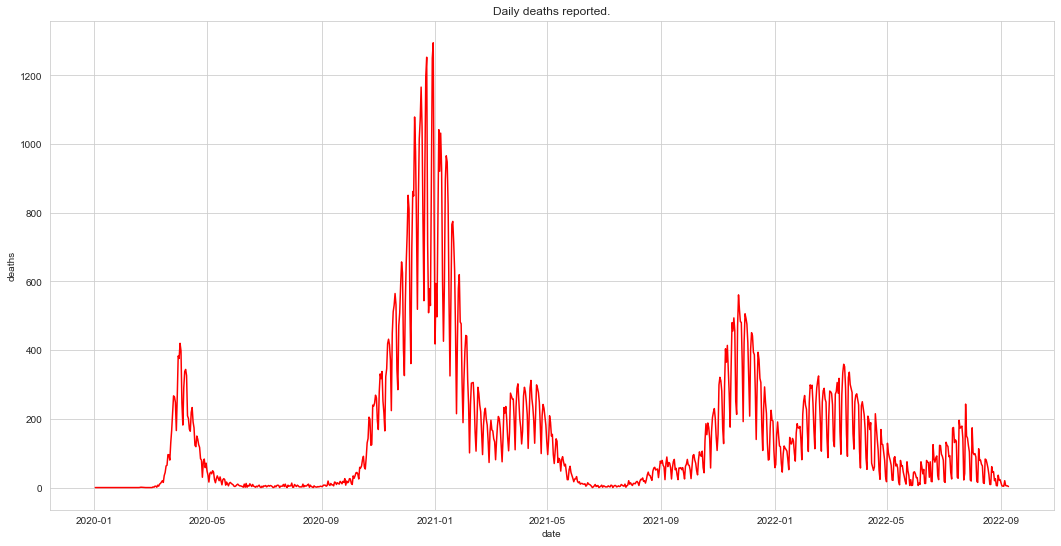

In [117]:
plt.figure(figsize=(18,9))
plt.title('Daily deaths reported.')
p=sns.lineplot(data=df_covid_by_date['deaths'], color='red')
plt.show()

##### Vaccine

----- Vaccine by Doses -----
          date    doses  doses_first  doses_second
532 2022-06-12     2373          208           319
224 2021-08-08   109129        26673         82288
48  2021-02-13   107893        62063         45830
424 2022-02-24   210521        11397         38238
135 2021-05-11  1166940       867863        299077
79  2021-03-16   179633       111224         68409
327 2021-11-19   535872        72709         54891
112 2021-04-18   267084       227943         39141
138 2021-05-14   741117       518604        222513
518 2022-05-29     2618          230           343


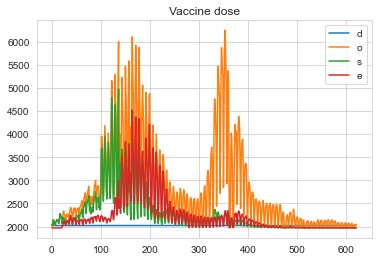

In [118]:
print('----- Vaccine by Doses -----')
vaccine_bydose = df_vaccine.drop(columns=['pfizer_cumul','moderna_cumul','astrazeneca_cumul','persons_first_cumul','persons_full_cumul'])
print(vaccine_bydose.sample(10))
plt.plot(vaccine_bydose)
plt.title("Vaccine dose")
plt.legend('doses')
plt.show()

In [119]:
vaccine_by_date = vaccine_bydose.groupby('date').sum()

<AxesSubplot:title={'center':'Daily Vaccine doses'}, xlabel='date', ylabel='doses'>

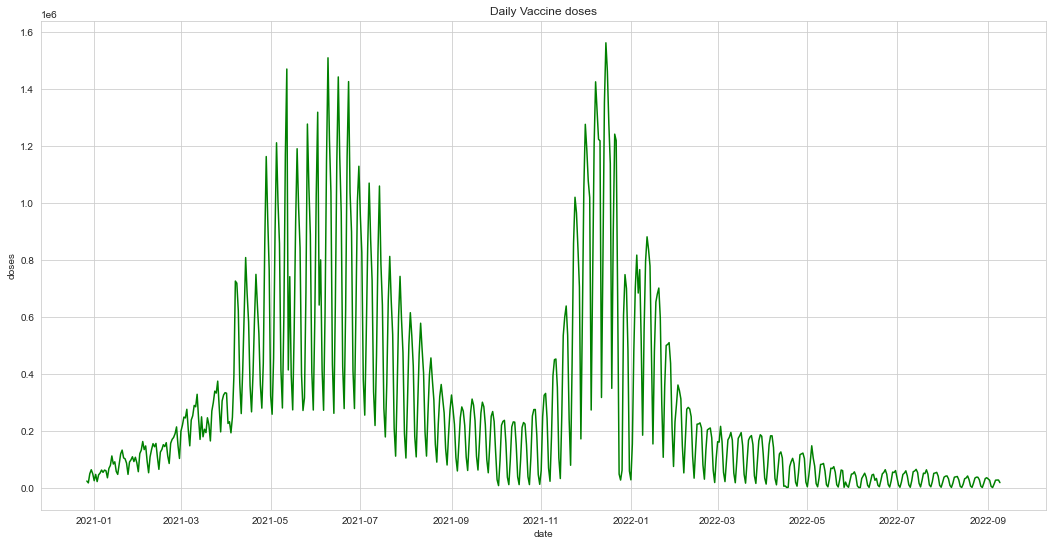

In [120]:
plt.figure(figsize=(18,9))
plt.title('Daily Vaccine doses')
sns.lineplot(x = 'date', y = 'doses',data=vaccine_by_date, color='green')

##### Active Cases analysis

In [121]:
df_covid['active'] = df_covid['cases'] - df_covid['recovered'] - df_covid['deaths']

print('')
print('On the 09-09-2022, there are', df_covid.active.sum(), 'active COVID-19 cases.') # currently active cases
print('')


On the 09-09-2022, there are 650794 active COVID-19 cases.



##### Gender analysis

In [122]:
gender_dist = df_demographic.groupby(by="gender").sum()
gender_dist["proportion %"] = gender_dist["population"] / gender_dist["population"].sum()*100
gender_dist

,population,proportion %
gender,,
F,42052522,50.653964
M,40966691,49.346036


In [123]:
df_covid_by_gender = df_covid.groupby('gender').sum()
df_covid_by_gender.sort_values('cases', ascending=False, inplace=True)

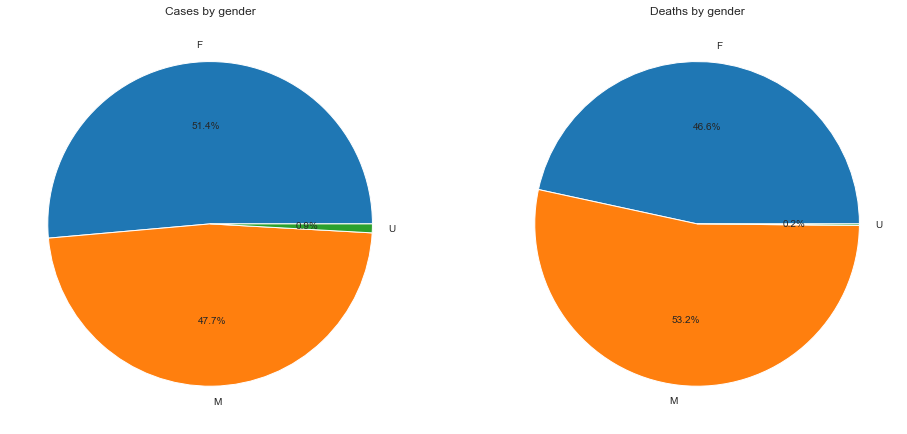

In [124]:
plt.figure(figsize=(16,20))
the_grid = GridSpec(1, 2)
plt.subplot(the_grid[0, 0], aspect=1, title='Cases by gender')
cases_pie = plt.pie(df_covid_by_gender.cases, labels=df_covid_by_gender.index, autopct='%1.1f%%',shadow=False)


plt.subplot(the_grid[0, 1], aspect=1, title='Deaths by gender')
death_pie = plt.pie(df_covid_by_gender.deaths, labels=df_covid_by_gender.index, autopct='%1.1f%%',shadow=False)

##### Age Group Analysis

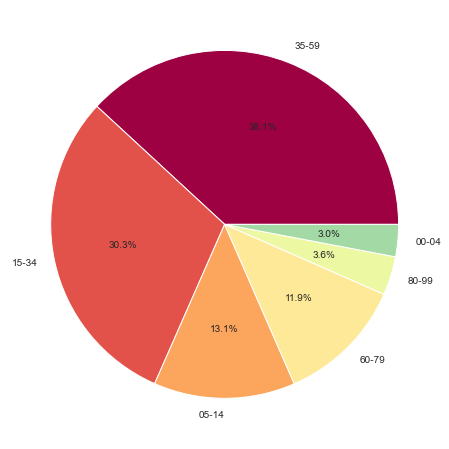

In [125]:
#Age group from df_covid dataset

df_covid_by_age = df_covid.groupby('age_group').sum()
df_covid_by_age.sort_values('cases', ascending=False, inplace=True)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(8,8))
Age_pie = plt.pie(df_covid_by_age.cases, labels=df_covid_by_age.index, autopct='%1.1f%%', shadow=False, colors=colors)

##### State analysis

In [126]:
df_covid_by_state = df_covid.groupby('state').sum()
df_covid_by_state.sort_values('cases', ascending=False, inplace=True)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


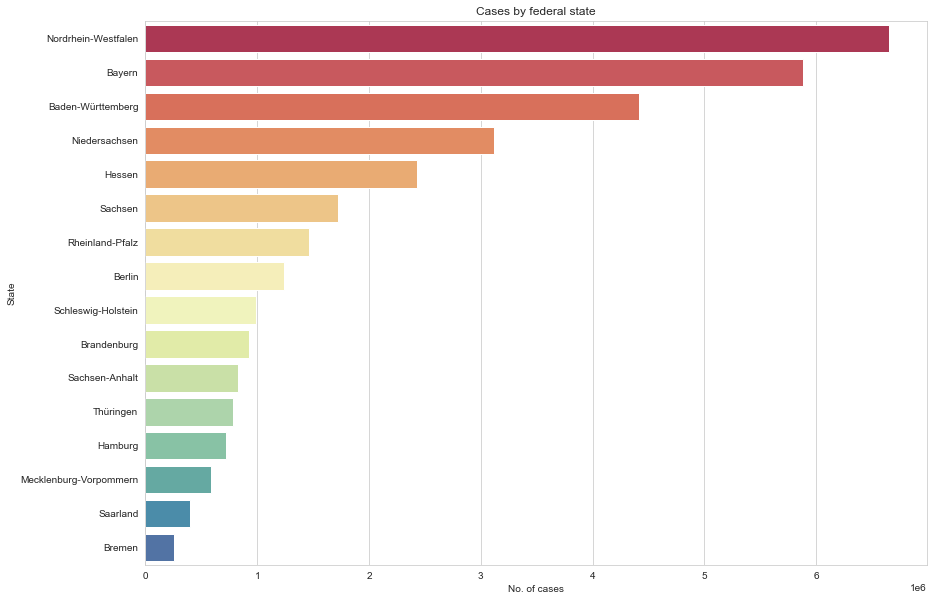

In [127]:

plt.figure(figsize=(14,10))
sns.barplot(df_covid_by_state.cases, df_covid_by_state.index, palette='Spectral')
plt.title("Cases by federal state")
plt.xlabel("No. of cases")
p=plt.ylabel("State")
plt.show()


##### Death and age_group

In [132]:
deaths_ratio = df_covid_by_age.deaths / df_covid_by_age.cases * 100.0
df_covid_by_age['death_ratio'] = deaths_ratio
df_covid_by_age.sort_values('death_ratio', ascending=False, inplace=True)

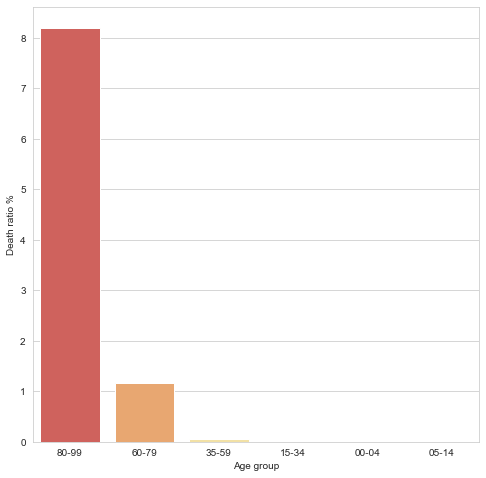

In [133]:
plt.figure(figsize=(8,8))
death_pie = sns.barplot(y=df_covid_by_age.death_ratio, x=df_covid_by_age.index, palette='Spectral')
p=plt.xlabel('Age group')
p=plt.ylabel('Death ratio %')

##### Death, age_group and gender

In [134]:
df_covid_by_sg = df_covid.groupby(['age_group', 'gender'],as_index=False).sum()

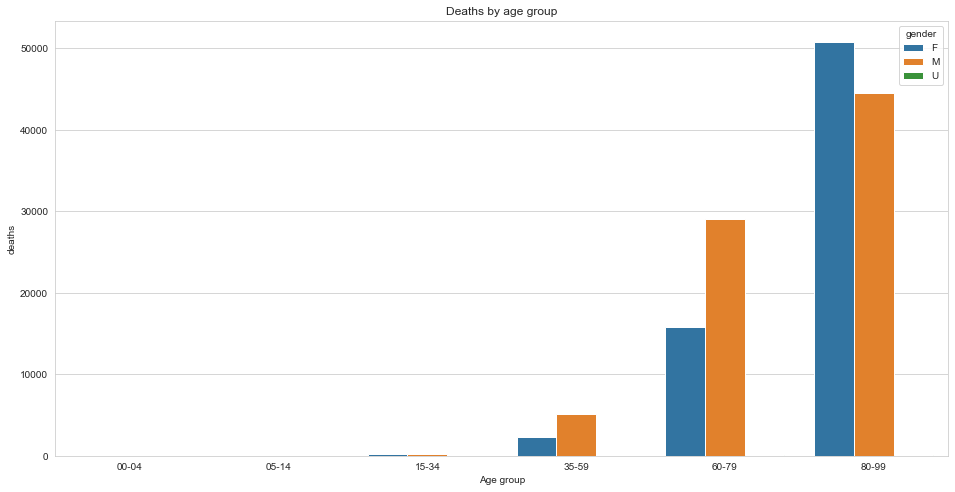

In [135]:
plt.figure(figsize=(16,8))
p = sns.barplot(y=df_covid_by_sg.deaths, x=df_covid_by_sg.age_group, hue=df_covid_by_sg.gender, data=df_covid_by_sg);
p=plt.title("Deaths by age group")
p=plt.ylabel("deaths")
p=plt.xlabel("Age group")

##### Covid Dataset

In [136]:
Image(url= "img/covid_overview.png")

In [137]:
Image(url= "img/covid_warning.png")

In [138]:
Image(url= "img/covid_correlations.png")

##### Vaccine dataset

In [139]:
Image(url= "img/Vaccine_overview.png")

In [140]:
Image(url= "img/Vaccine_warnings.png")

In [141]:
Image(url= "img/Vaccine_correlations.png")

##### Demographic dataset

In [142]:
Image(url= "img/Demographic_overview.png")

In [143]:
Image(url= "img/Demographic_warnings.png")

##### Observations 

<div class="alert alert-block alert-info">
<style>
ul.a{list-style-type: circle;}
</style>
<b>
Observations "Multi-column profiling"
</b> 
<p>we observe the following, For the Missing data in the all datasets :</p>

</br><b>Covid dataset</b>
<ul class="a">
  <li>Date and cases column have association</li>
  <li>Same as Date and Deaths</li>
</ul>

</div>

## Discovery of dependencies

In [144]:
Image(url= "img/covid_table_depe.png")

In [145]:
Image(url= "img/vaccine_multi_depe.png")

In [146]:
Image(url= "img/demo_multi_depe.png")

## Data Visualisation

In [167]:
# Cumulated cases over time by state
df_cov_rel = df_covid.groupby(by=["state", "date"]).sum()
df_cov_rel = df_cov_rel.replace([np.inf, -np.inf], 0)
df_cov_rel = df_cov_rel.replace(np.nan, 0)
df_cov_rel["cases_cumsum"] = df_cov_rel.groupby(level=-2)["cases"].cumsum()
df_cov_rel = df_cov_rel.reset_index()

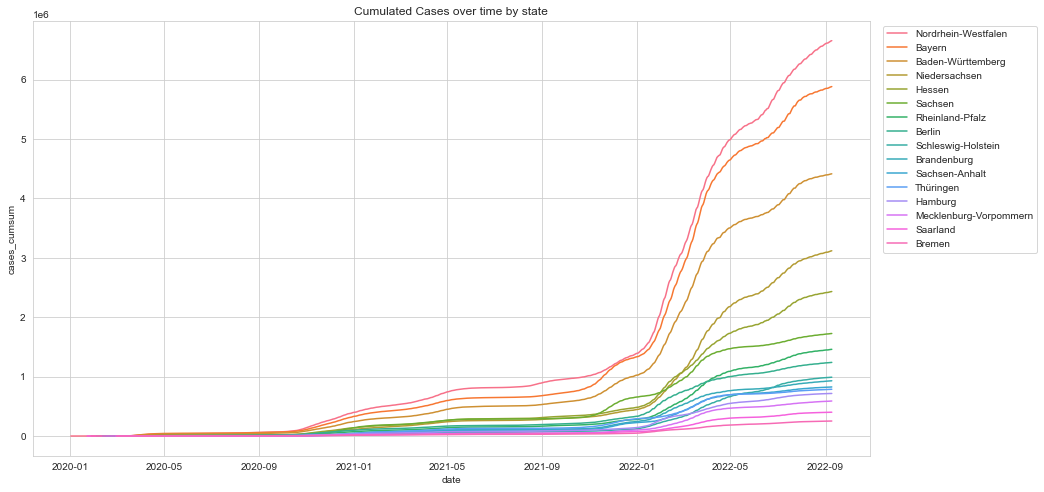

In [168]:
plt.figure(figsize=(15,8))
ln = sns.lineplot(data=df_cov_rel.sort_values("cases_cumsum", ascending=False), x="date", y="cases_cumsum", hue="state")
ln.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title("Cumulated Cases over time by state")
plt.show()

In [169]:
# Cumulated cases over time by state
df_cov_rel = df_covid.groupby(by=["state", "date"]).sum()
df_cov_rel = df_cov_rel.replace([np.inf, -np.inf], 0)
df_cov_rel = df_cov_rel.replace(np.nan, 0)
df_cov_rel["deaths_cumsum"] = df_cov_rel.groupby(level=-2)["deaths"].cumsum()
df_cov_rel = df_cov_rel.reset_index()

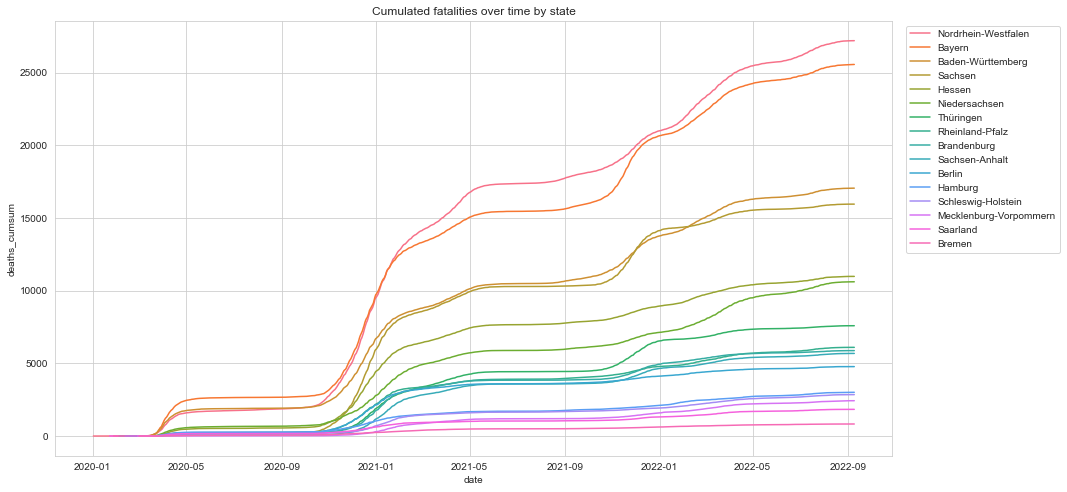

In [170]:

#Cumulated fatalities over time by state

plt.figure(figsize=(15,8))
ln = sns.lineplot(data=df_cov_rel.sort_values("deaths_cumsum", ascending=False), x="date", y="deaths_cumsum", hue="state")
ln.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title("Cumulated fatalities over time by state")
plt.show()

##### Geographical overview

In [147]:
df_state_cov = df_covid.groupby(by="state", as_index=False).sum()
df_state_dem = df_demographic[["state", "population"]].groupby(by="state", as_index=False).sum()
df_state = df_map.merge(df_state_cov, how="left", left_on="GEN", right_on="state")
df_state = df_state.merge(df_state_dem, how="left", left_on="GEN", right_on="state")
df_state.drop(columns=["state_x", "state_y"], inplace=True)

df_state["case_ratio"] = df_state["cases"] * (1000 / df_state["population"])
df_state["death_ratio"] = df_state["deaths"] * (1000 / df_state["population"])
df_state["death_case_ratio"] = 100 * df_state["deaths"] / df_state["cases"]

df_state.set_index("GEN", inplace=True)


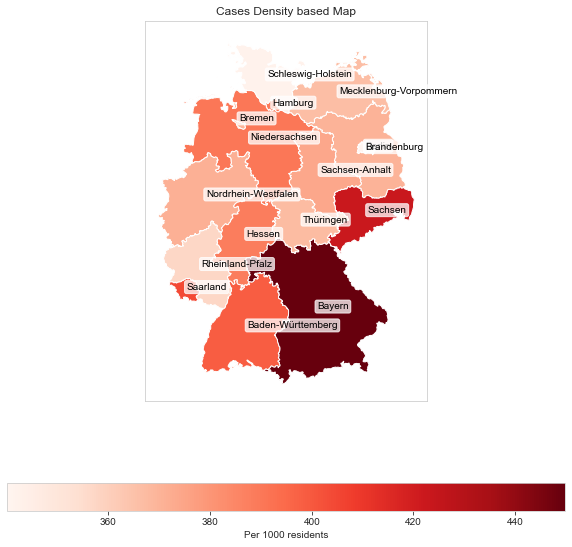

In [148]:
df_state.plot(column="case_ratio", legend=True,
                    legend_kwds={"label": "Per 1000 residents",
                                 "orientation": "horizontal"}, cmap="Reds",figsize=(10, 10))
for i, geo in df_state.centroid.iteritems():
    plt.annotate(text=i, xy=[geo.x, geo.y], color="black",
         bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.75))
plt.xticks([])
plt.yticks([])
plt.title("Cases Density based Map")
plt.show()



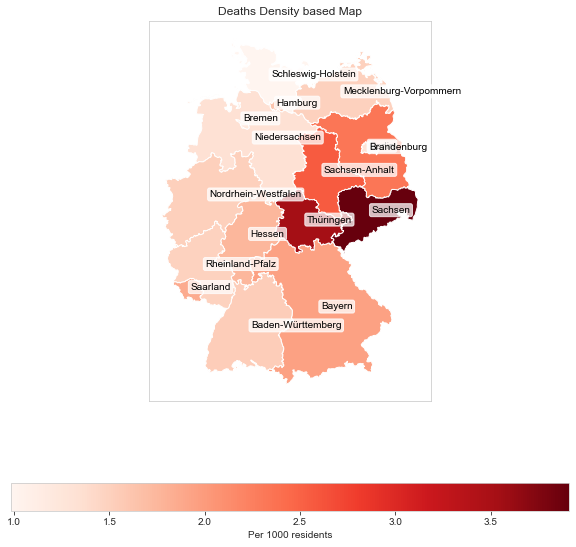

In [149]:
df_state.plot(column="death_ratio", legend=True,
                    legend_kwds={"label": "Per 1000 residents",
                                 "orientation": "horizontal"}, cmap="Reds",figsize=(10, 10))
for i, geo in df_state.centroid.iteritems():
    plt.annotate(text=i, xy=[geo.x, geo.y], color="black",
         bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.75))
plt.xticks([])
plt.yticks([])
plt.title("Deaths Density based Map")
plt.show()

<ipython-input-150-eed84a2ffe9f>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.annotate(s=i, xy=[geo.x, geo.y], color="black",
<ipython-input-150-eed84a2ffe9f>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax2.annotate(s=i, xy=[geo.x, geo.y], color="black",
<ipython-input-150-eed84a2ffe9f>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax3.annotate(s=i, xy=[geo.x, geo.y], color="black",


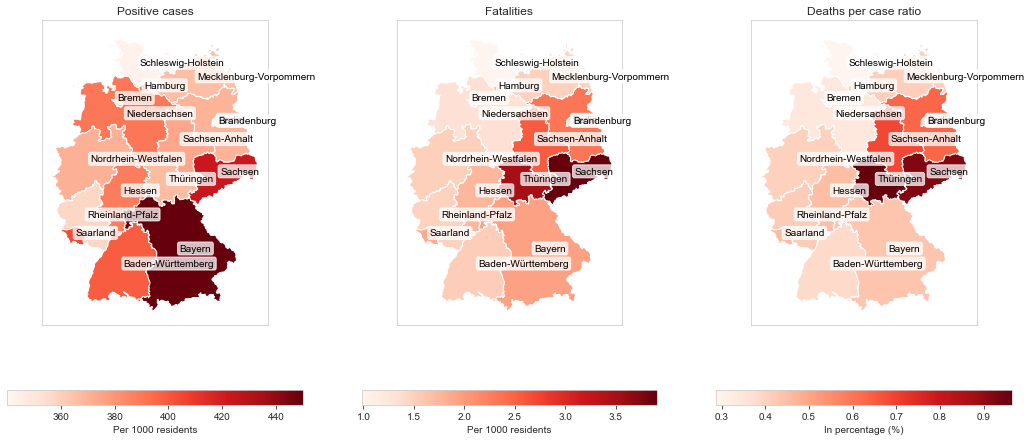

In [150]:


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,8))
df_state.plot(column="case_ratio", legend=True,
                    legend_kwds={"label": "Per 1000 residents",
                                 "orientation": "horizontal"}, cmap="Reds", ax=ax1)
for i, geo in df_state.centroid.iteritems():
    ax1.annotate(s=i, xy=[geo.x, geo.y], color="black",
         bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.75))
ax1.set_title("Positive cases")

df_state.plot(column="death_ratio", legend=True,
                    legend_kwds={"label": "Per 1000 residents",
                                 "orientation": "horizontal"}, cmap="Reds", ax=ax2)
for i, geo in df_state.centroid.iteritems():
    ax2.annotate(s=i, xy=[geo.x, geo.y], color="black",
         bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.75))
ax2.set_title("Fatalities")

df_state.plot(column="death_case_ratio", legend=True,
                    legend_kwds={"label": "In percentage (%)",
                                 "orientation": "horizontal"}, cmap="Reds", ax=ax3)
for i, geo in df_state.centroid.iteritems():
    ax3.annotate(s=i, xy=[geo.x, geo.y], color="black",
         bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.75))
ax3.set_title("Deaths per case ratio")
    
ax1.axes.get_xaxis().set_visible(False)  
ax2.axes.get_xaxis().set_visible(False)  
ax3.axes.get_xaxis().set_visible(False)   
ax1.axes.get_yaxis().set_visible(False)  
ax2.axes.get_yaxis().set_visible(False)  
ax3.axes.get_yaxis().set_visible(False)  
plt.show()

